In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [11]:
df = pd.read_csv("C:\\Users\\shahm\\Downloads\\Copy of loan.csv")

In [12]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

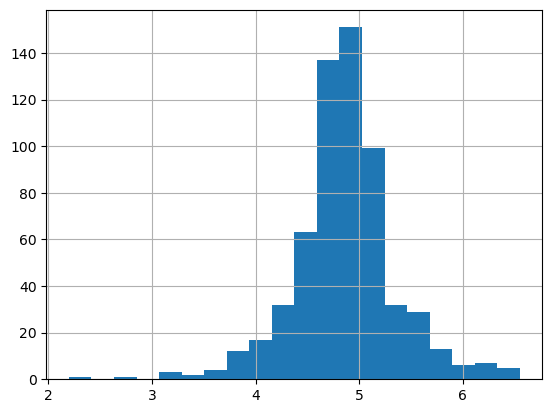

In [19]:
df['loanAmount_log']= np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

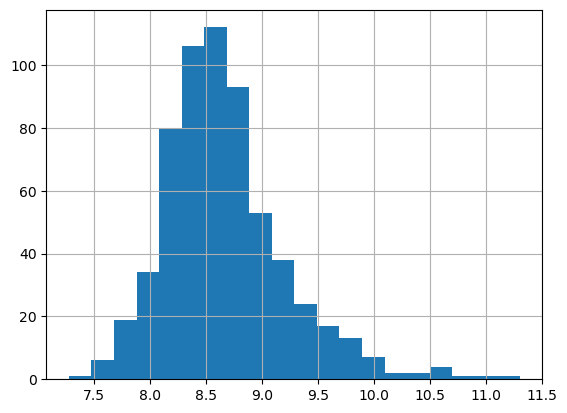

In [15]:
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [20]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log = df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
TotalIncome_log      0
loanAmount_log       0
dtype: int64

In [21]:
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

x

array([['Male', 'No', '0', ..., 1.0, 5849.0, 8.674025985443025],
       ['Male', 'Yes', '1', ..., 1.0, 6091.0, 8.714567550836485],
       ['Male', 'Yes', '0', ..., 1.0, 3000.0, 8.006367567650246],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 8312.0, 9.025455532779063],
       ['Male', 'Yes', '2', ..., 1.0, 7583.0, 8.933664178700935],
       ['Female', 'No', '0', ..., 0.0, 4583.0, 8.430109084509125]],
      dtype=object)

In [23]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [25]:
print("Percentage of missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

Percentage of missing gender is 0.000000%


Number Of people who take loan as group by gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

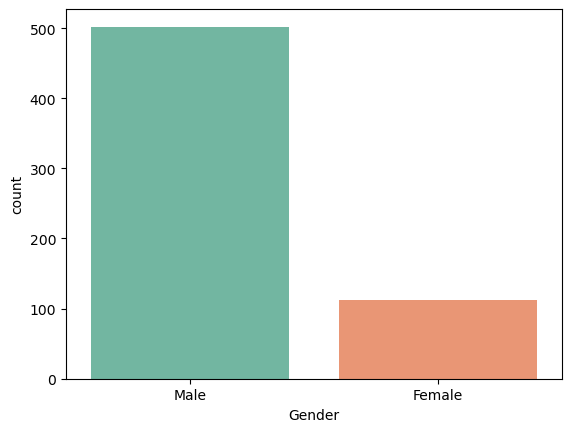

In [37]:
print("Number Of people who take loan as group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df, palette = 'Set2')

###### 

Number Of people who take loan as group by Maritial Status:
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

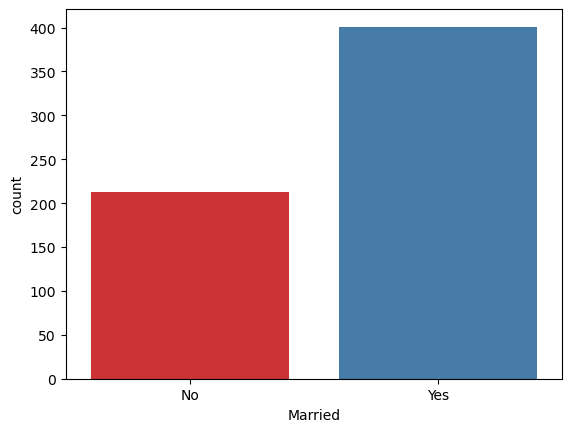

In [38]:
print("Number Of people who take loan as group by Maritial Status:")
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df, palette = 'Set1')

Number Of people who take loan as group by dependency:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

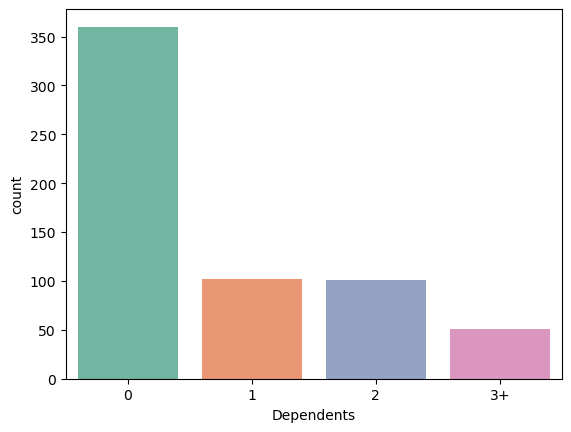

In [39]:
print("Number Of people who take loan as group by dependency:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df, palette = 'Set2')

Number Of people who take loan as self employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

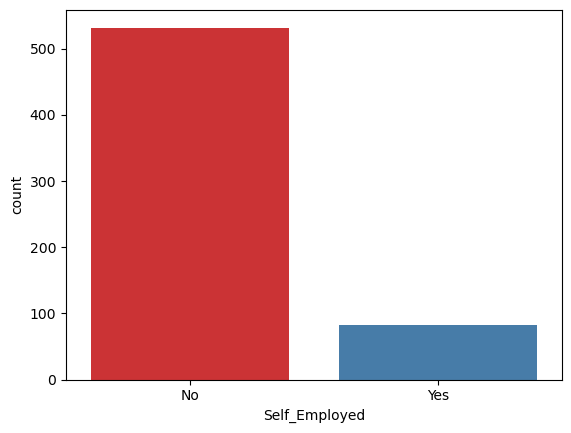

In [41]:
print("Number Of people who take loan as self employed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df, palette = 'Set1')

Number Of people who take loan as group by LoanAmount:
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

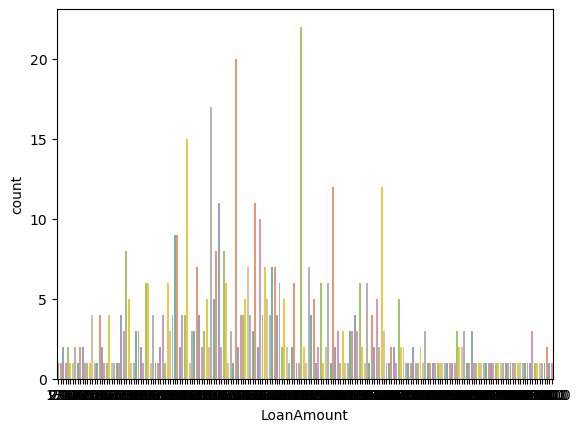

In [42]:
print("Number Of people who take loan as group by LoanAmount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=df, palette = 'Set2')

Number Of people who take loan as group by Credit History:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

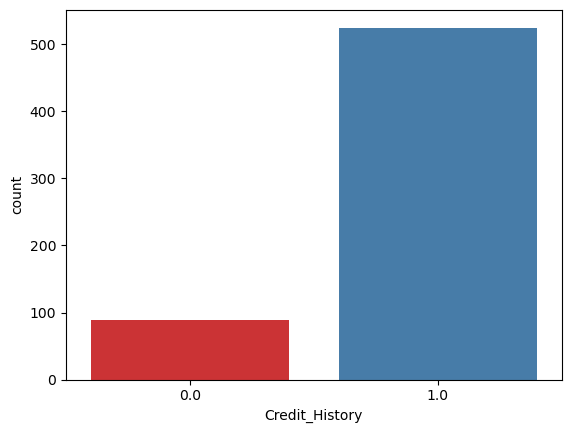

In [44]:
print("Number Of people who take loan as group by Credit History:")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df, palette = 'Set1')

In [47]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

In [61]:
for i in range(0,5):
    x_train[:,i] = Labelencoder_x.fit_transform(x_train[:,i])
    x_train[:,7] = Labelencoder_x.fit_transform(x_train[:,7])
    
x_train

array([[1, 1, 0, ..., 1.0, 5858.0, 267],
       [1, 0, 1, ..., 1.0, 11250.0, 407],
       [1, 1, 0, ..., 0.0, 5681.0, 249],
       ...,
       [1, 1, 3, ..., 1.0, 8334.0, 363],
       [1, 1, 0, ..., 1.0, 6033.0, 273],
       [0, 1, 0, ..., 1.0, 6486.0, 301]], dtype=object)

In [62]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [63]:
for i in range(0,5):
    x_test[:,i] = Labelencoder_x.fit_transform(x_test[:,i])
    x_test[:,7] = Labelencoder_x.fit_transform(x_test[:,7])
    
x_test

array([[1, 0, 0, 0, 5, 1.0, 7085.0, 85],
       [0, 0, 0, 0, 5, 1.0, 4230.0, 28],
       [1, 1, 0, 0, 5, 1.0, 10039.0, 104],
       [1, 1, 0, 0, 5, 1.0, 6784.0, 80],
       [1, 1, 2, 0, 5, 1.0, 3875.0, 22],
       [1, 1, 0, 1, 3, 0.0, 6058.0, 70],
       [1, 1, 3, 0, 3, 1.0, 6417.0, 77],
       [1, 0, 0, 0, 5, 1.0, 12876.0, 114],
       [1, 0, 0, 0, 5, 0.0, 5124.0, 53],
       [1, 1, 0, 0, 5, 1.0, 5233.0, 55],
       [0, 0, 0, 0, 5, 1.0, 2917.0, 4],
       [1, 1, 1, 0, 5, 1.0, 2895.0, 2],
       [0, 0, 0, 0, 5, 1.0, 8333.0, 96],
       [1, 1, 2, 0, 5, 1.0, 8667.0, 97],
       [1, 1, 0, 0, 5, 1.0, 14880.0, 117],
       [1, 1, 1, 0, 5, 1.0, 3875.0, 22],
       [1, 0, 1, 1, 5, 1.0, 4311.0, 32],
       [1, 0, 0, 1, 5, 1.0, 3946.0, 25],
       [0, 0, 0, 0, 5, 1.0, 2500.0, 1],
       [1, 1, 0, 1, 5, 0.0, 4787.0, 44],
       [0, 1, 0, 0, 5, 0.0, 6085.0, 71],
       [1, 1, 0, 0, 5, 1.0, 4765.0, 43],
       [1, 1, 2, 0, 5, 1.0, 7550.0, 91],
       [1, 1, 2, 0, 5, 1.0, 11500.0, 111],
       [1, 

In [64]:
Labelencoder_y = LabelEncoder()

y_test = Labelencoder_y.fit_transform(y_test)
y_test


array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [68]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [69]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
from sklearn import metrics
y_pred = rfc.predict(x_test)

print("Accuracy of random forest classifier is",metrics.accuracy_score(y_pred,y_test))

y_pred

Accuracy of random forest classifier is 0.7723577235772358


array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [76]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [80]:
y_pred = nb_clf.predict(x_test)

print("Accuracy of GaussianNB classifier is",metrics.accuracy_score(y_pred,y_test))

y_pred

Accuracy of GaussianNB classifier is 0.8373983739837398


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
y_pred = dt_clf.predict(x_test)

print("Accuracy of Decision Treeclassifier is",metrics.accuracy_score(y_pred,y_test))

y_pred

Accuracy of Decision Treeclassifier is 0.7317073170731707


array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [83]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [84]:
y_pred = kn_clf.predict(x_test)

print("Accuracy of KNeighborsClassifier is",metrics.accuracy_score(y_pred,y_test))

y_pred

Accuracy of KNeighborsClassifier is 0.7723577235772358


array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [86]:
print("GaussianNb is proved to be the best learning and predicitive model as compared to others as it gives accuracy upto 83% which is way better than the others.")
print("THANK YOU, By Het Shah")

GaussianNb is proved to be the best learning and predicitive model as compared to others as it gives accuracy upto 83% which is way better than the others.
THANK YOU, By Het Shah
